# Attempt to observe strain-induced scattering in TiO2 (rutile) I16 27th July 2022

Some further notes and images in google docs:
https://docs.google.com/document/d/10SO-vzpcSOCuXYwxNxbJ41a2fyw2lzrutlw8KHURJ-E/edit#heading=h.nm9zwainnoz3

## Summary

Measured 001 forbidden reflection in several samples. 2x TiO2 10mm x 10mm x 0.3mm 110 surace normal, looking at 001 edge, bent in 110, 1-10 plane with sample 3-point bender (maunual plastic screw and two fixed streel screws). Also 2 x strips cut from square with laser (I14) and etched in HCL over night to try to remove cracks.

1. Uncut sample. Measured 001 and checked for harmonics and M/S. Appeared to be consistent weak intensity. Measurements were carried out for 002 allowed (for reference) with very strong attenuation, with/without harmonic rejection mirrors; 001 with/without mirrors (no attenuation) and 001 26% transmission.
Sample broke after applying strain so only have un-strained data.

2. Laser cut strip. As above (broke on first tighten)

3. As above.

4. Uncut, as (1) but didn't break. Measured unstrained, (1, 2, 3) x 1/8 screw turn and final 1/4 turn. Last scans longer and finer to allow reciprocal space maps.

General results:

1. Weak 001 was ubiquitous. Didn't seem to change much with applied strain or different samples (from same batch).
2. Always aditional broader peak - rod or diffuse scattering? (Look at maps).
3. All peaks (including forbidden 001) get broader with strain (uncut sample 2); integral ~ constant with strain
4. Origin of forbidden reflection remains unclear.

Next:
1. Is it just multiple scattering? Measure 001 vs psi over 360 degrees and compare with dynamical m/s simulations (measure Iss and Isp, which should be quite sensitive to model predctions).
2. Measure temperature dependence. Will go down with D-W or possibly up with anharmonic forbidden scattering.


In [1]:
import sys
sys.path.append('/dls_sw/apps/scisoftpy/2.7')
sys.path.append('/dls_sw/i16/software/python')
from dlstools import *
from dlstools.pdnx import *
from matplotlib.pyplot import *

from dlstools.quickfit import *
import matplotlib.pyplot as plt

%matplotlib notebook
p= '/dls/i16/data/2022/cm31138-12/%i.nxs'

=== Importing dlstools package


<IPython.core.display.Javascript object>


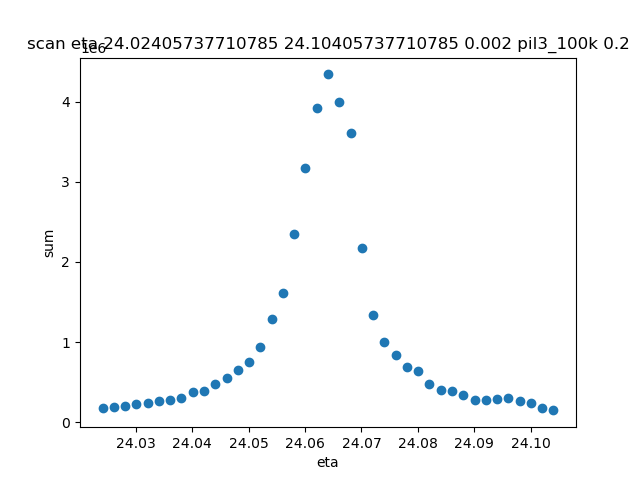

<IPython.core.display.Javascript object>


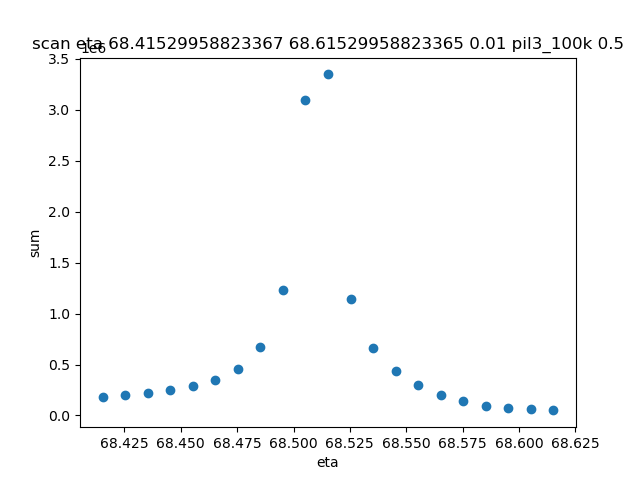

In [2]:
#110 atten 20
n = pdnx(p % 944806)
n.nx.plot()
#002 atten 20
n = pdnx(p % 944809)
n.nx.plot()

<IPython.core.display.Javascript object>


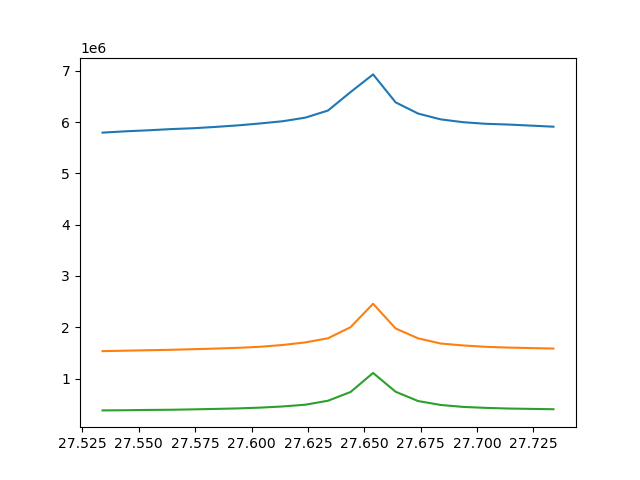

In [3]:
figure()
#001 atten 0
n = pdnx(p % 944812)
plot(n.eta, n['sum'])
#001 atten 2 (26%)
n = pdnx(p % 944813)
plot(n.eta, n['sum'])
#001 atten 4 (6.9%)
n = pdnx(p % 944814)
plot(n.eta, n['sum'])
### only background is changing - looking at harmonics



<IPython.core.display.Javascript object>


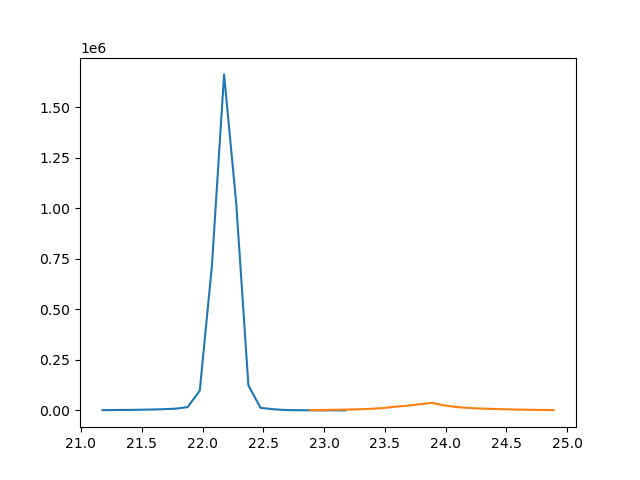

In [4]:
#scancn base_y .1 21 pil .5 #944816
# minimirrors out
figure()
n = pdnx(p % 944816)
plot(n.base_y, n['sum'])
#minimirrors in
n = pdnx(p % 944817)
plot(n.base_y, n['sum'])
#alignment good

<IPython.core.display.Javascript object>


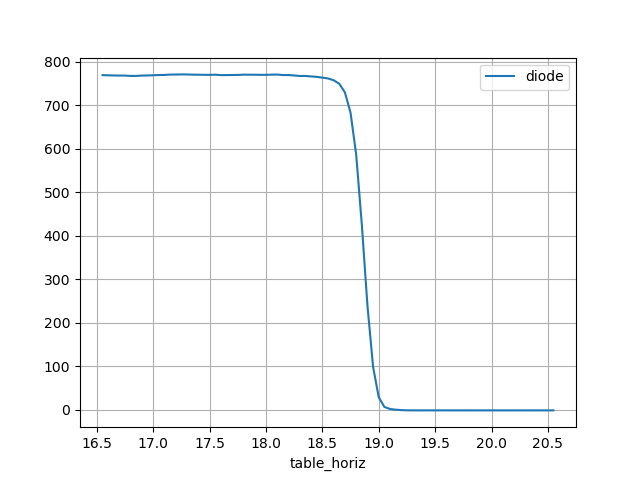

In [7]:
n = pdnx(p % 944823)
n.plot('table_horiz', 'diode')
grid(1)

<IPython.core.display.Javascript object>


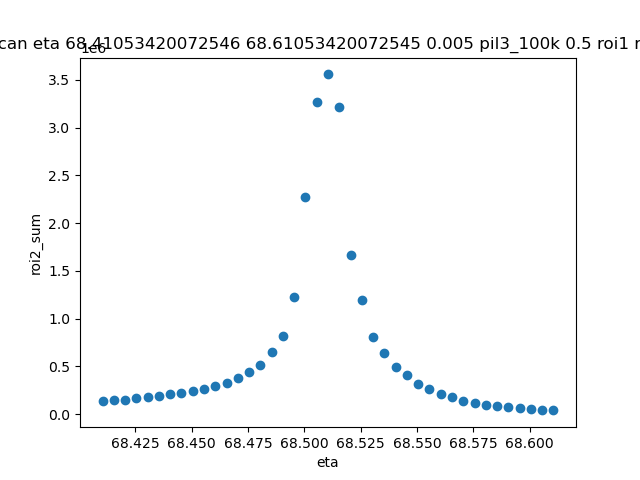

In [8]:
figure()
n = pdnx(p % 944816)
plot(n.base_y, n['sum'])
#minimirrors in
n = pdnx(p % 944817)
plot(n.base_y, n['sum'])
#alignment good

## Uncut sample; minimal bend



In [9]:
#previous data alignment may be bad (sz off) - repeat

002 atten 20 harm mirrors out
002 atten 20 harm mirrors in


<IPython.core.display.Javascript object>


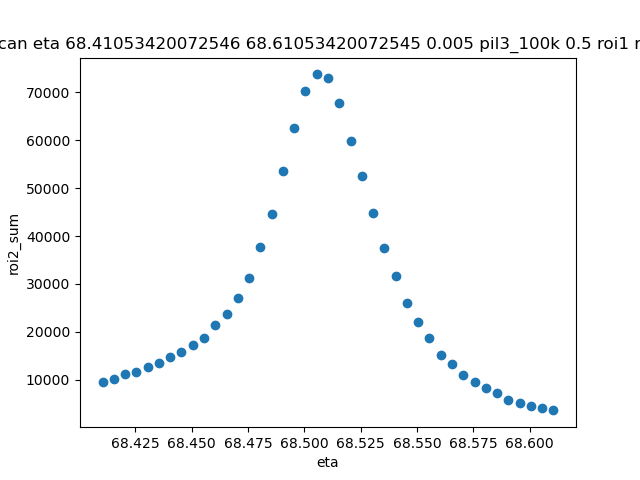

001 atten 0 harm mirrors out


<IPython.core.display.Javascript object>


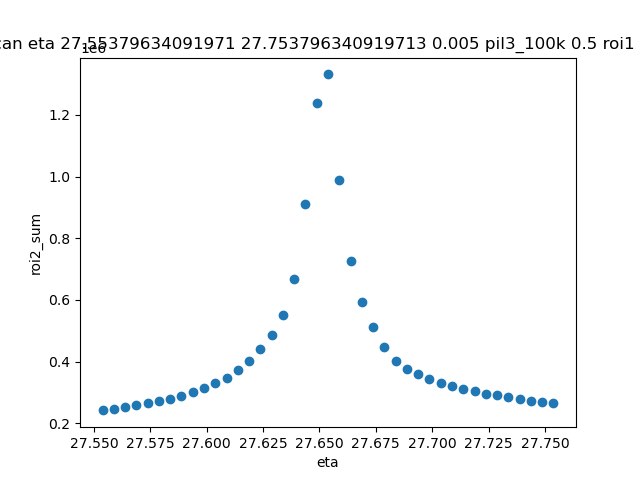

001 atten 0 harm mirrors in


<IPython.core.display.Javascript object>


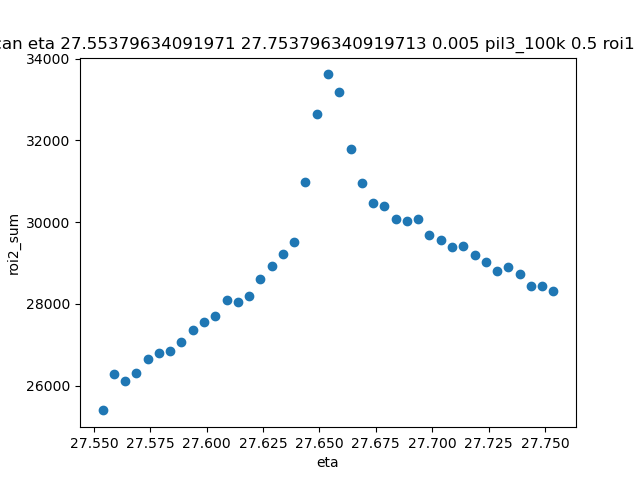

001 atten 2 (26%) harm mirrors in


<IPython.core.display.Javascript object>


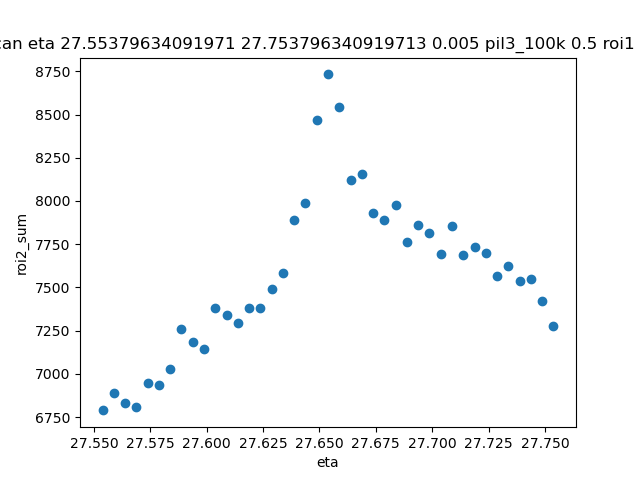

In [10]:

txt =[]
txt+=['002 atten 20 harm mirrors out']
txt+=['002 atten 20 harm mirrors in']
txt+=['001 atten 0 harm mirrors out']
txt+=['001 atten 0 harm mirrors in']
txt+=['001 atten 2 (26%) harm mirrors in']

scans = range(944859, 944863+1)
for i in range(len(scans)):
    print(txt[i])
    n = pdnx(p % scans[i])
    n.nx.plot()

<IPython.core.display.Javascript object>


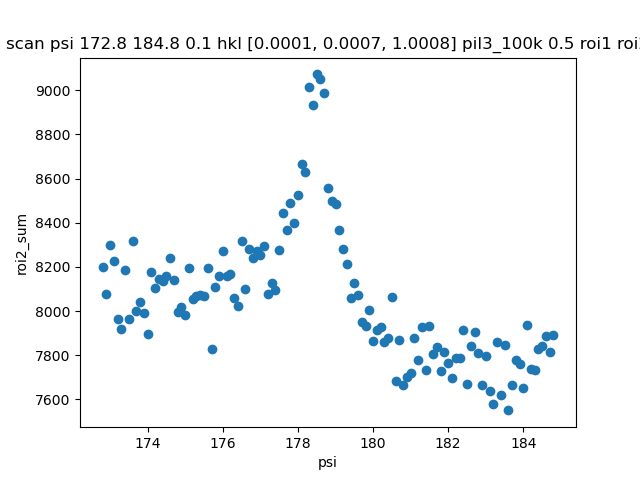

<IPython.core.display.Javascript object>


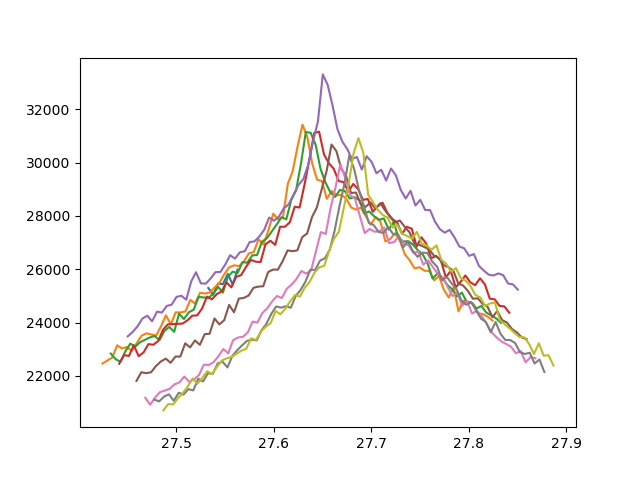

In [11]:
#doesn'tlook like multiple scattering

n = pdnx(p % 944864)
n.nx.plot()
figure()
for scan in range(944866, 944874+1):
    n = pdnx(p % scan)
    plot(n.eta, n.roi2_sum)

<IPython.core.display.Javascript object>


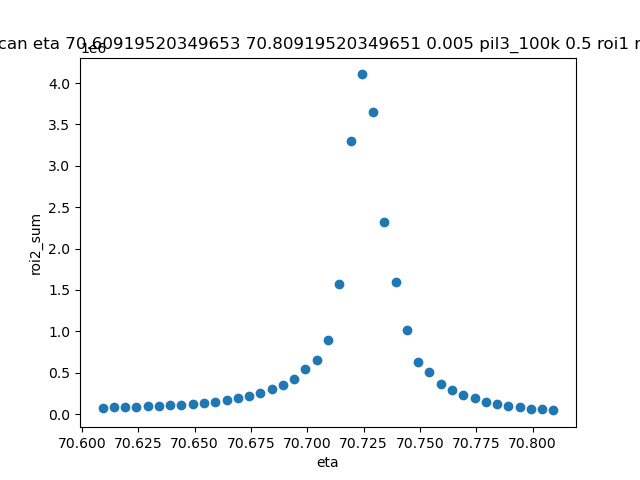

In [12]:
#same data in 3d (roi1 against phi)

from mpl_toolkits import mplot3d

ax = figure().gca(projection='3d')
for i in range(944866, 944874+1):
   n = pdnx(p % i)
   n['psi']=float(n.nx.entry1.before_scan.psi.psi)
   n['phi']=float(n.nx.entry1.before_scan.diffractometer_sample.phi)
   ax.plot(n.eta, n.phi, n.roi1_sum); xlabel('eta'); ylabel('phi')



In [13]:
#use phi = 88 psi = -178
#bend sample ... try for 1/4 turn on screw ... broke!
#try laser-cut sample 3a

002 atten 20 harm mirrors out
002 atten 20 harm mirrors in


<IPython.core.display.Javascript object>


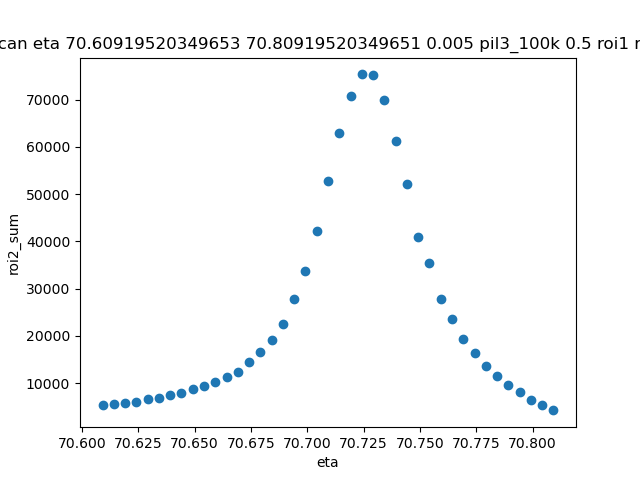

001 atten 0 harm mirrors out


<IPython.core.display.Javascript object>


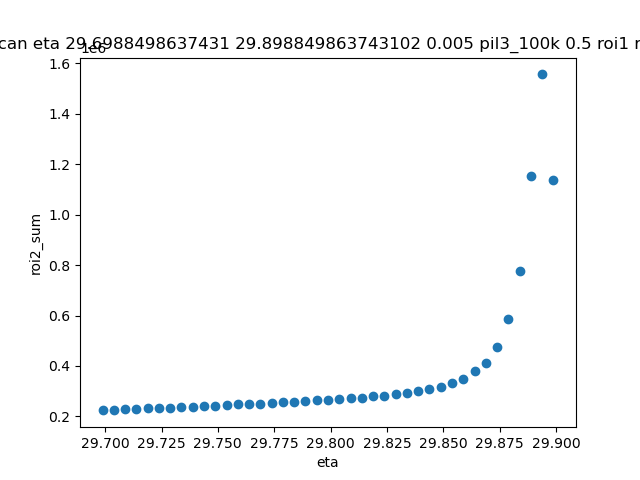

001 atten 0 harm mirrors in


<IPython.core.display.Javascript object>


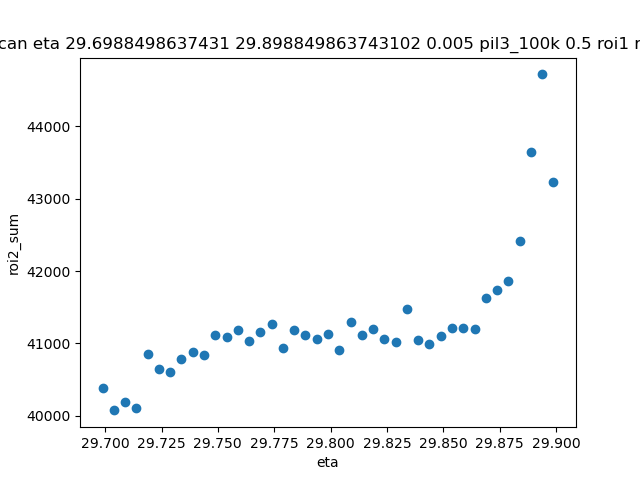

001 atten 2 (26%) harm mirrors in


<IPython.core.display.Javascript object>


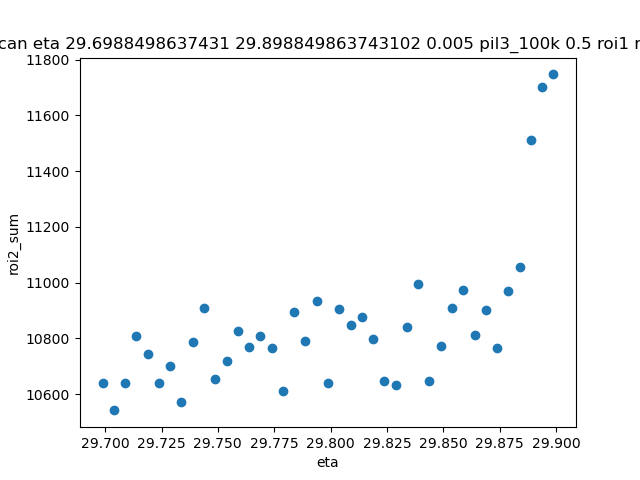

001 atten 0 harm mirrors out wide scan


<IPython.core.display.Javascript object>


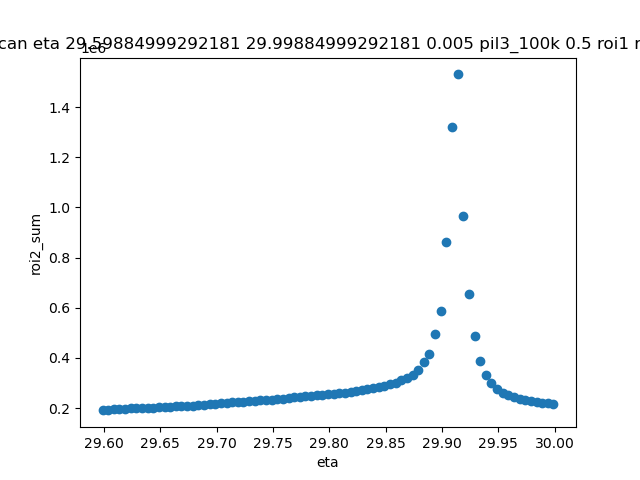

001 atten 0 harm mirrors in wide scan


<IPython.core.display.Javascript object>


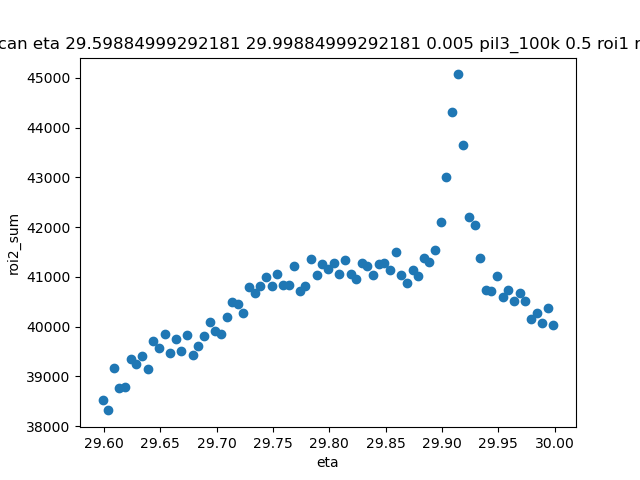

001 atten 2 (26%) harm mirrors in wide scan


<IPython.core.display.Javascript object>


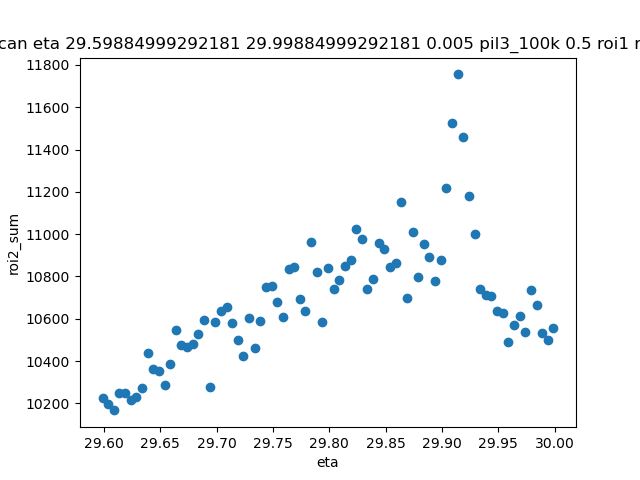

In [14]:
#sample 3a - laser-cut rod (longest), lightly strained
# extra scans to increase range - sample moving?
# intensities same as uncut sample; unlikely the strain is exactly the same, so no eviddence of change with strain
# except - screw not in contact and sample broke as soon as it was tightened - no evidence either way
txt =[]
txt+=['002 atten 20 harm mirrors out']
txt+=['002 atten 20 harm mirrors in']
txt+=['001 atten 0 harm mirrors out']
txt+=['001 atten 0 harm mirrors in']
txt+=['001 atten 2 (26%) harm mirrors in']
txt+=['001 atten 0 harm mirrors out wide scan']
txt+=['001 atten 0 harm mirrors in wide scan']
txt+=['001 atten 2 (26%) harm mirrors in wide scan']

scans = range(944900, 944907+1)
for i in range(len(scans)):
    print(txt[i])
    n = pdnx(p % scans[i])
    n.nx.plot()

002 atten 20 harm mirrors out


<IPython.core.display.Javascript object>


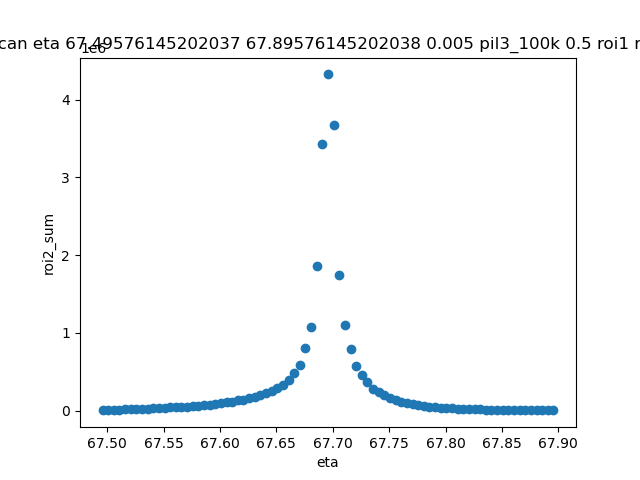

002 atten 20 harm mirrors in


<IPython.core.display.Javascript object>


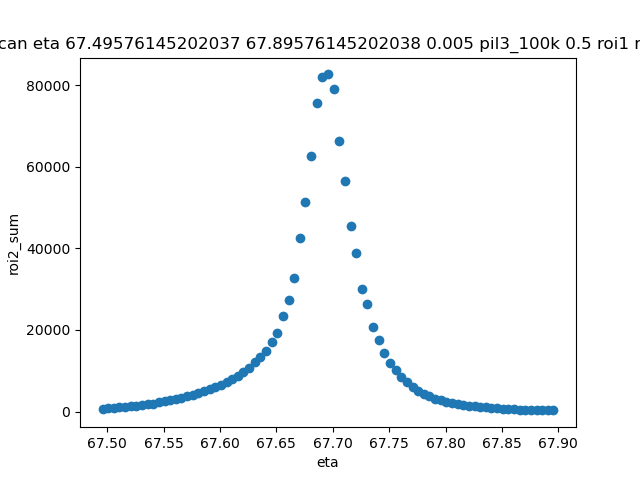

001 atten 0 harm mirrors out


<IPython.core.display.Javascript object>


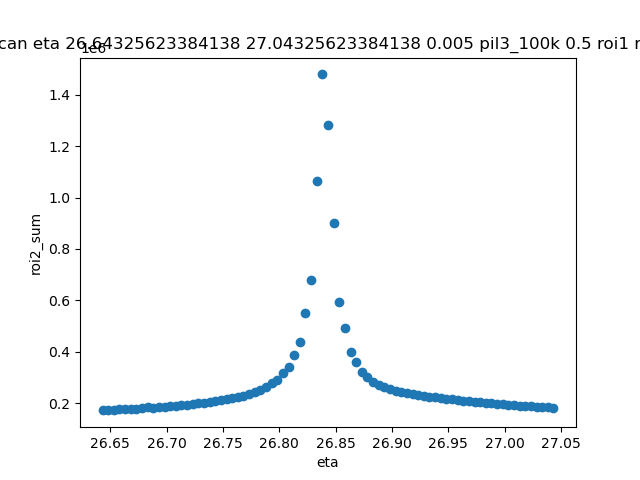

001 atten 0 harm mirrors in


<IPython.core.display.Javascript object>


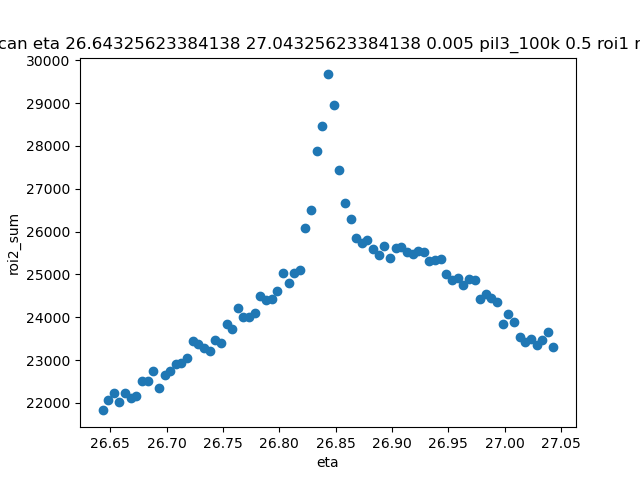

001 atten 2 (26%) harm mirrors in


<IPython.core.display.Javascript object>


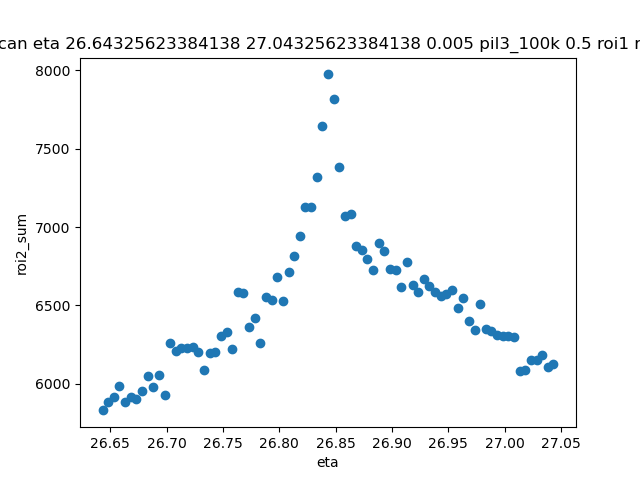

In [17]:
#second un-cut sampe; lightly strained

txt =[]
txt+=['002 atten 20 harm mirrors out']
txt+=['002 atten 20 harm mirrors in']
txt+=['001 atten 0 harm mirrors out']
txt+=['001 atten 0 harm mirrors in']
txt+=['001 atten 2 (26%) harm mirrors in']


scans = range(944916, 944920+1)
for i in range(len(scans)):
    print(txt[i])
    n = pdnx(p % scans[i])
    n.nx.plot()

002 atten 20 harm mirrors out


<IPython.core.display.Javascript object>


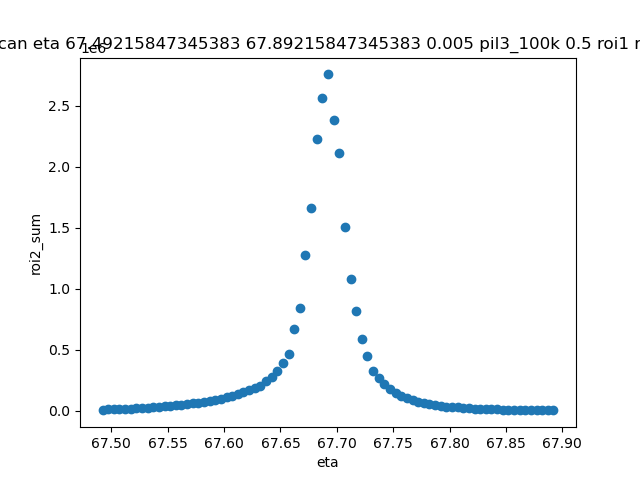

002 atten 20 harm mirrors in


<IPython.core.display.Javascript object>


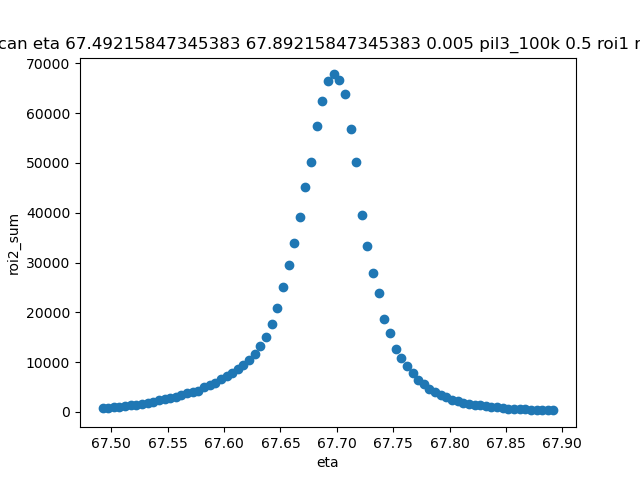

001 atten 0 harm mirrors out


<IPython.core.display.Javascript object>


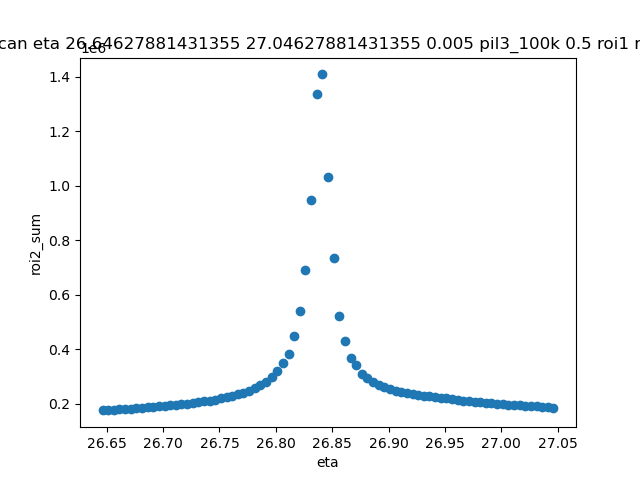

001 atten 0 harm mirrors in


<IPython.core.display.Javascript object>


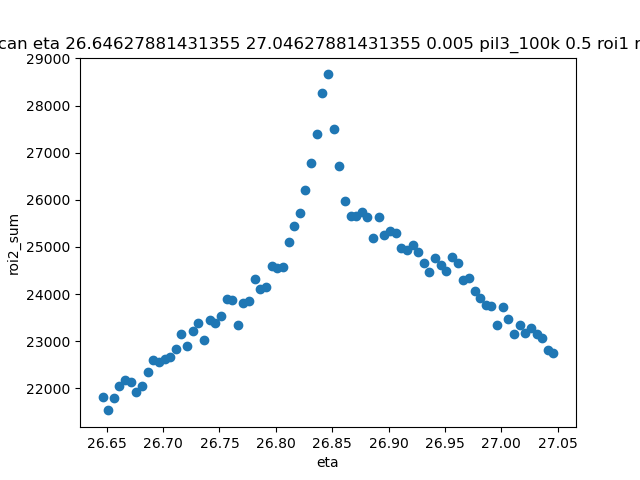

In [20]:
#second un-cut sampe; 1/8  or so turn - didn't break but mostly tilted sample (chi) so may be no change
#looks the same as before!
#try another 1/8 turn...ok!... more measurements...

txt =[]
txt+=['002 atten 20 harm mirrors out']
txt+=['002 atten 20 harm mirrors in']
txt+=['001 atten 0 harm mirrors out']
txt+=['001 atten 0 harm mirrors in']
txt+=['001 atten 2 (26%) harm mirrors in']


scans = range(944923, 944926+1)
for i in range(len(scans)):
    print(txt[i])
    n = pdnx(p % scans[i])
    n.nx.plot()

002 atten 20 harm mirrors out


<IPython.core.display.Javascript object>


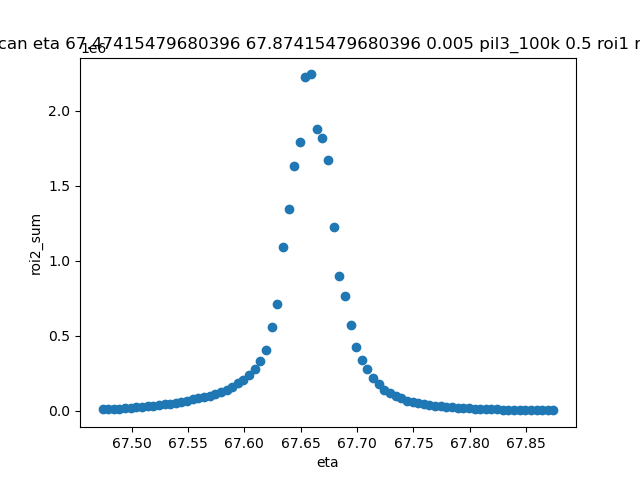

002 atten 20 harm mirrors in


<IPython.core.display.Javascript object>


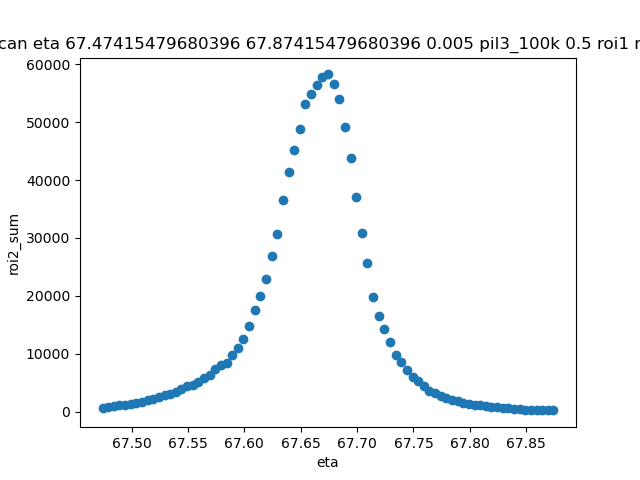

001 atten 0 harm mirrors out


<IPython.core.display.Javascript object>


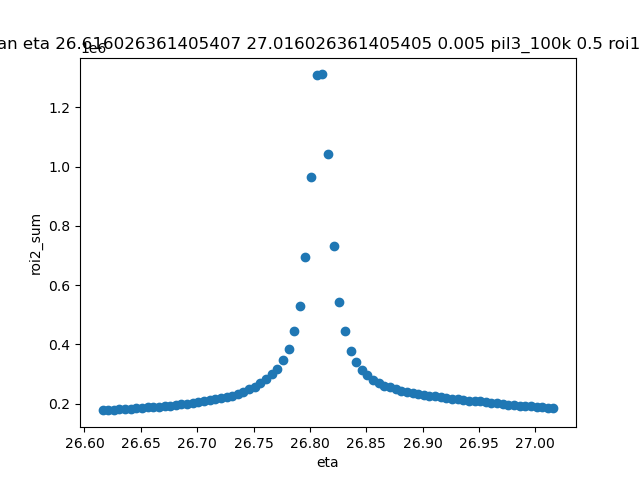

001 atten 0 harm mirrors in


<IPython.core.display.Javascript object>


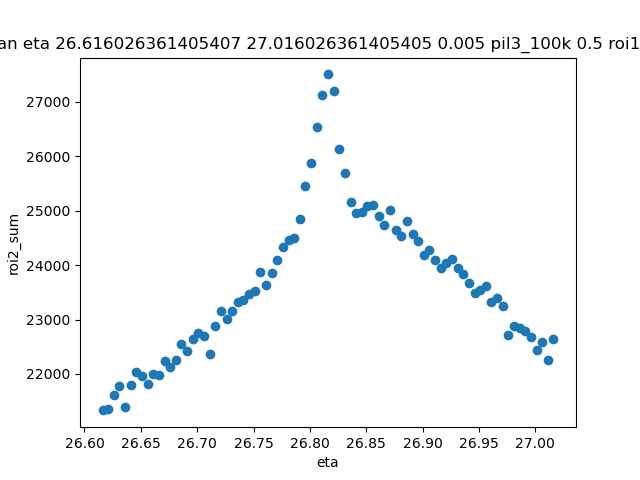

001 atten 2 (26%) harm mirrors in


<IPython.core.display.Javascript object>


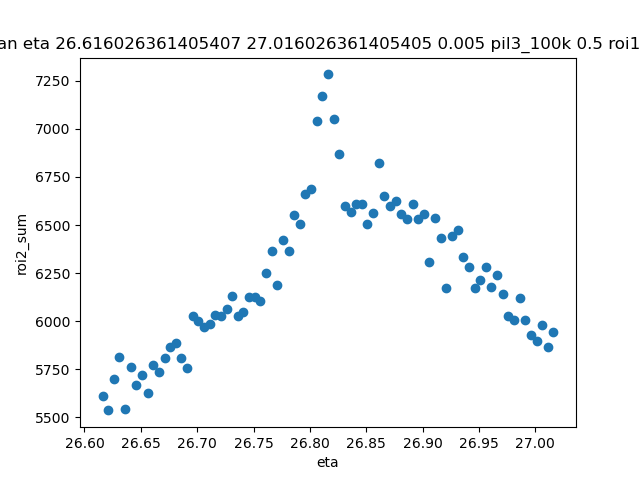

In [24]:
#second un-cut sample; second 1/8 turn without breaking!
# try another 1/8 turn...didn't break!

txt =[]
txt+=['002 atten 20 harm mirrors out']
txt+=['002 atten 20 harm mirrors in']
txt+=['001 atten 0 harm mirrors out']
txt+=['001 atten 0 harm mirrors in']
txt+=['001 atten 2 (26%) harm mirrors in']


scans = range(944932, 944936+1)
for i in range(len(scans)):
    print(txt[i])
    n = pdnx(p % scans[i])
    n.nx.plot()

002 atten 20 harm mirrors out


<IPython.core.display.Javascript object>


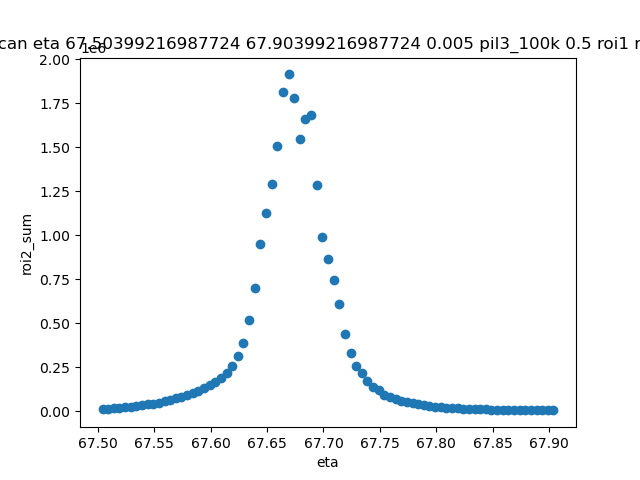

002 atten 20 harm mirrors in


<IPython.core.display.Javascript object>


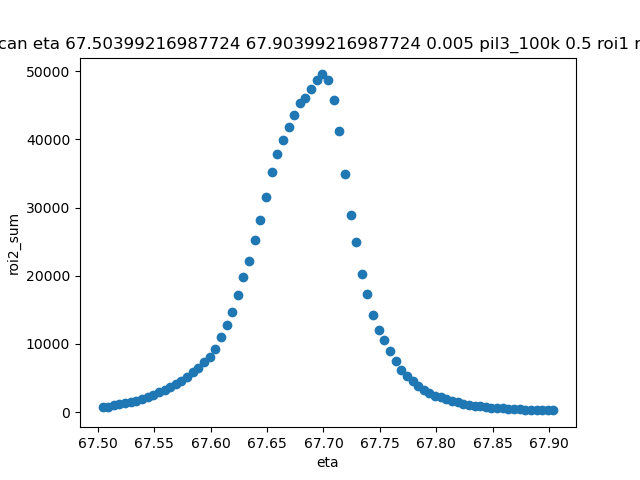

001 atten 0 harm mirrors out


<IPython.core.display.Javascript object>


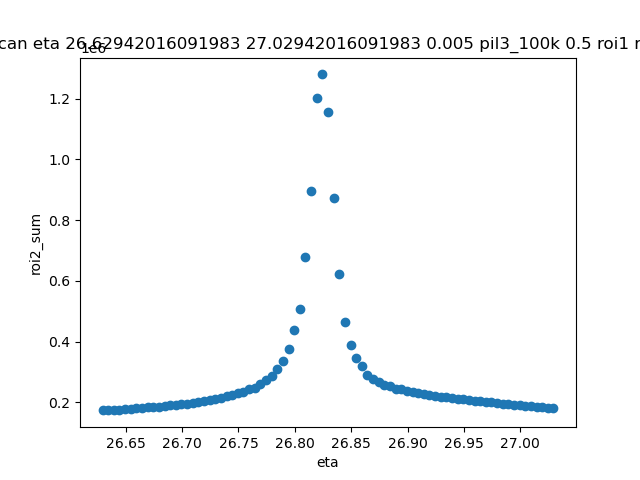

001 atten 0 harm mirrors in


<IPython.core.display.Javascript object>


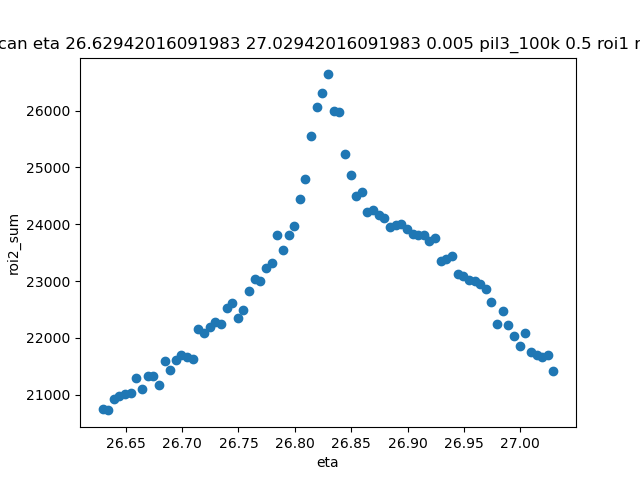

001 atten 2 (26%) harm mirrors in


<IPython.core.display.Javascript object>


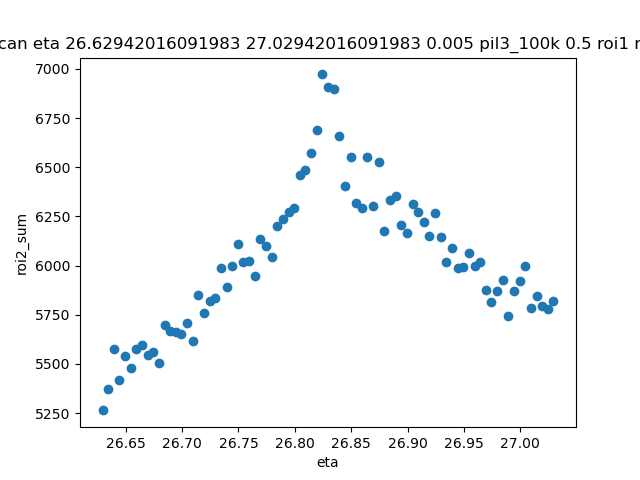

In [27]:
#second un-cut sample; third 1/8 turn without breaking!
# another 1/8 turn - ok

txt =[]
txt+=['002 atten 20 harm mirrors out']
txt+=['002 atten 20 harm mirrors in']
txt+=['001 atten 0 harm mirrors out']
txt+=['001 atten 0 harm mirrors in']
txt+=['001 atten 2 (26%) harm mirrors in']


scans = range(944942, 944946+1)
for i in range(len(scans)):
    print(txt[i])
    n = pdnx(p % scans[i])
    n.nx.plot()

002 atten 20 harm mirrors out


<IPython.core.display.Javascript object>


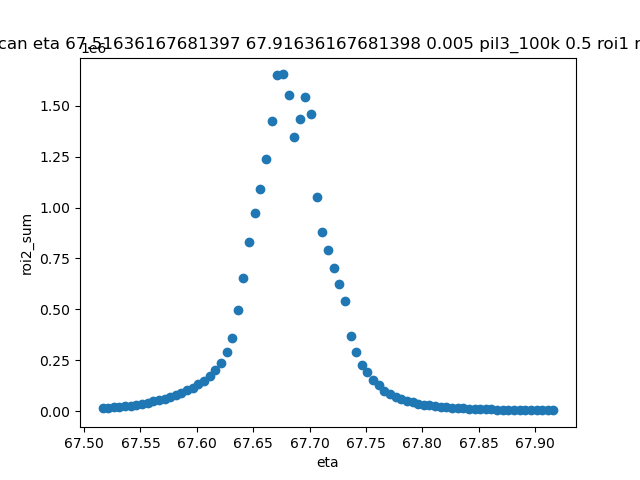

002 atten 20 harm mirrors in


<IPython.core.display.Javascript object>


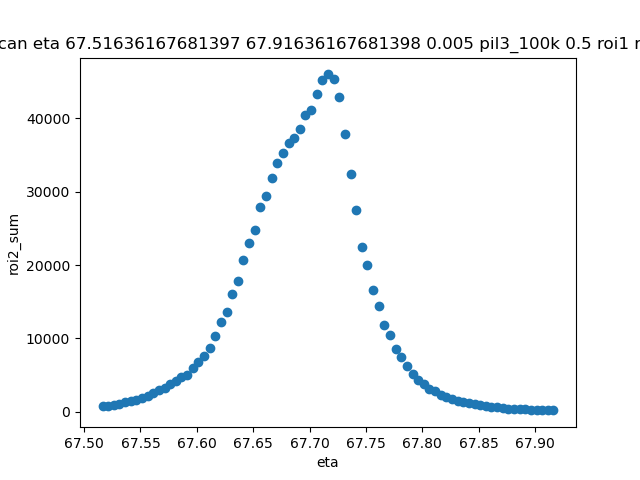

001 atten 0 harm mirrors out


<IPython.core.display.Javascript object>


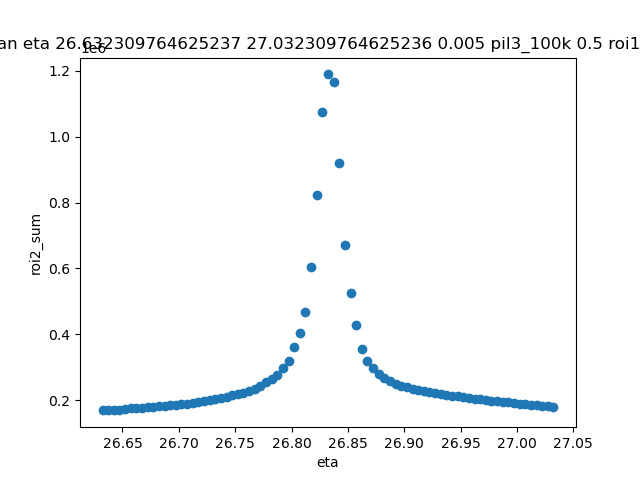

001 atten 0 harm mirrors in


<IPython.core.display.Javascript object>


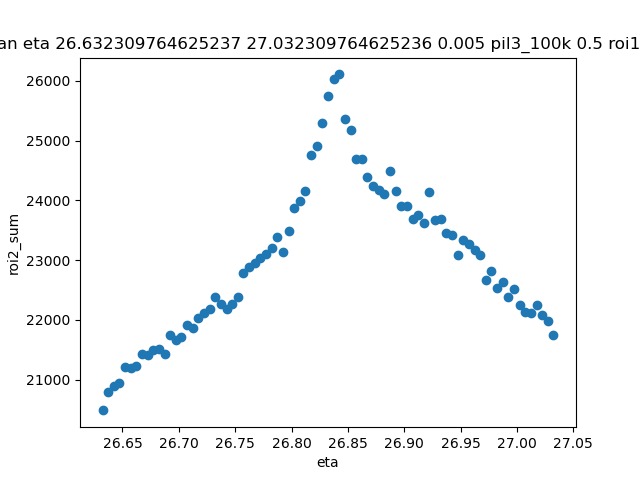

001 atten 2 (26%) harm mirrors in


<IPython.core.display.Javascript object>


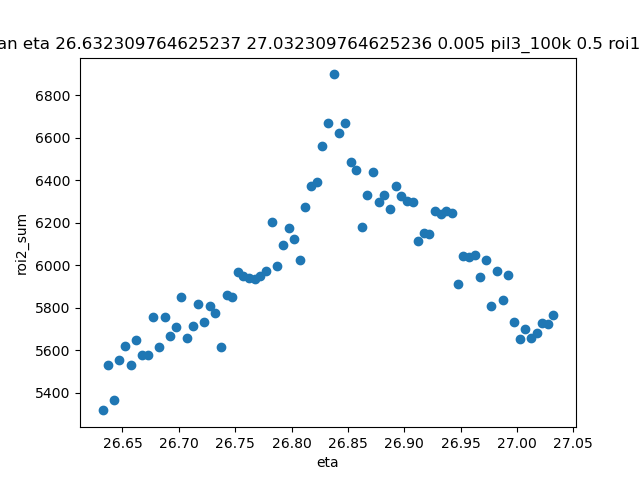

In [29]:
#second un-cut sample; 4th 1/8 turn without breaking!
# final turn - 1/4 this time...didn't break

txt =[]
txt+=['002 atten 20 harm mirrors out']
txt+=['002 atten 20 harm mirrors in']
txt+=['001 atten 0 harm mirrors out']
txt+=['001 atten 0 harm mirrors in']
txt+=['001 atten 2 (26%) harm mirrors in']


scans = range(944949, 944953+1)
for i in range(len(scans)):
    print(txt[i])
    n = pdnx(p % scans[i])
    n.nx.plot()

002 atten 20 harm mirrors out


<IPython.core.display.Javascript object>


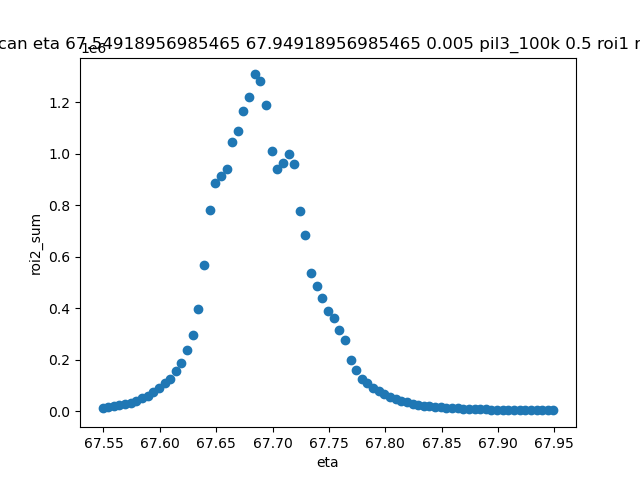

002 atten 20 harm mirrors in


<IPython.core.display.Javascript object>


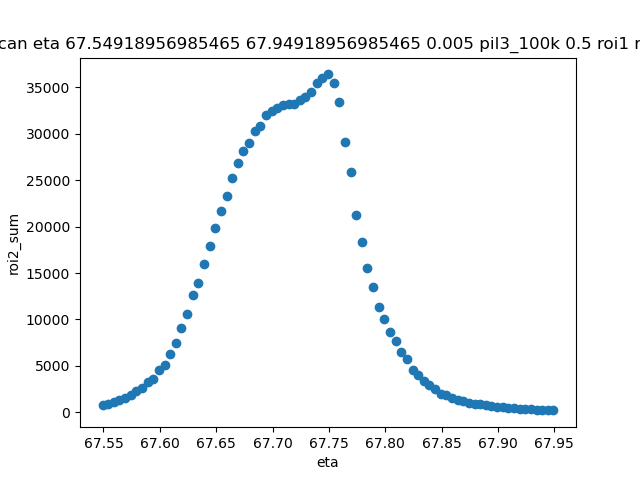

001 atten 0 harm mirrors out


<IPython.core.display.Javascript object>


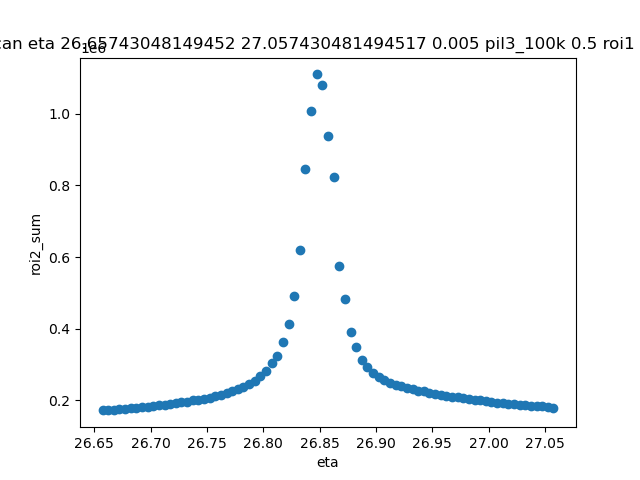

001 atten 0 harm mirrors in


<IPython.core.display.Javascript object>


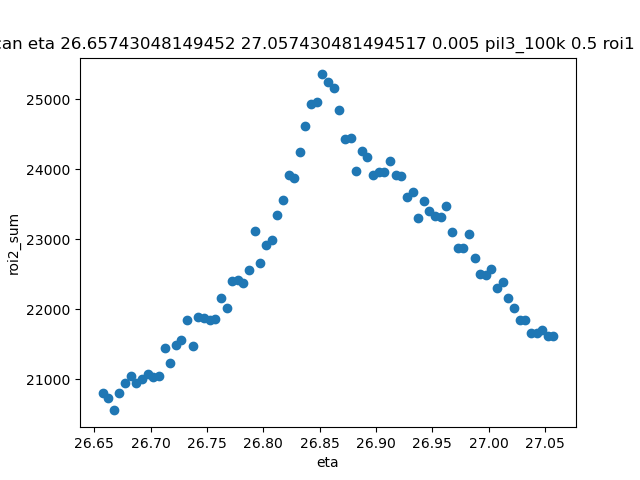

001 atten 2 (26%) harm mirrors in


<IPython.core.display.Javascript object>


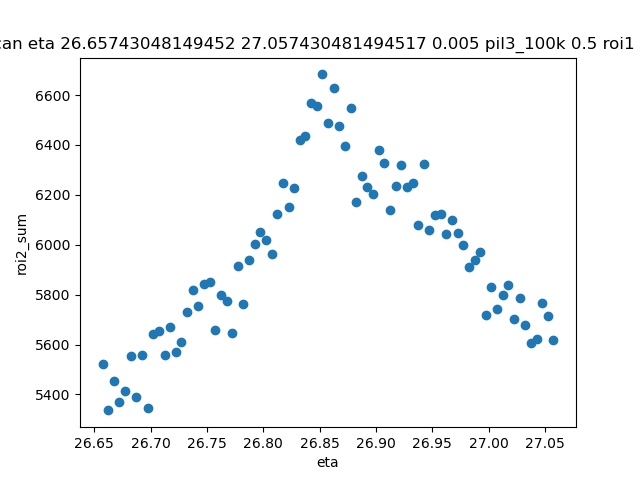

002 atten 20 harm mirrors out - long scan


<IPython.core.display.Javascript object>


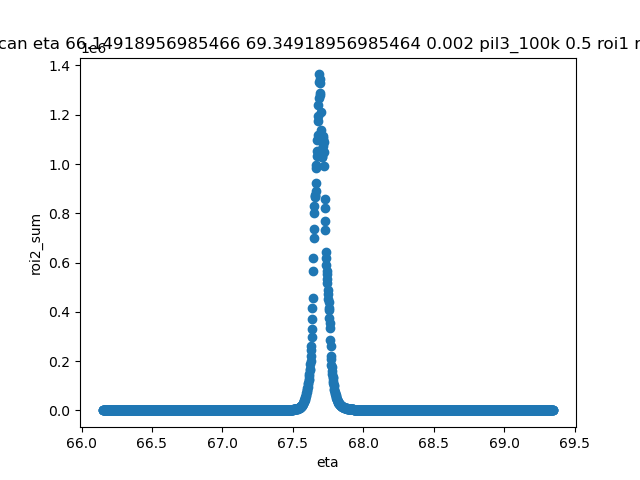

002 atten 20 harm mirrors in - long scan


<IPython.core.display.Javascript object>


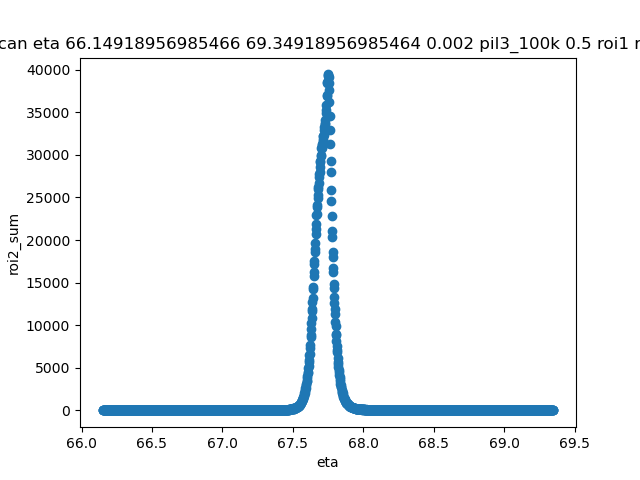

001 atten 0 harm mirrors out - long scan


<IPython.core.display.Javascript object>


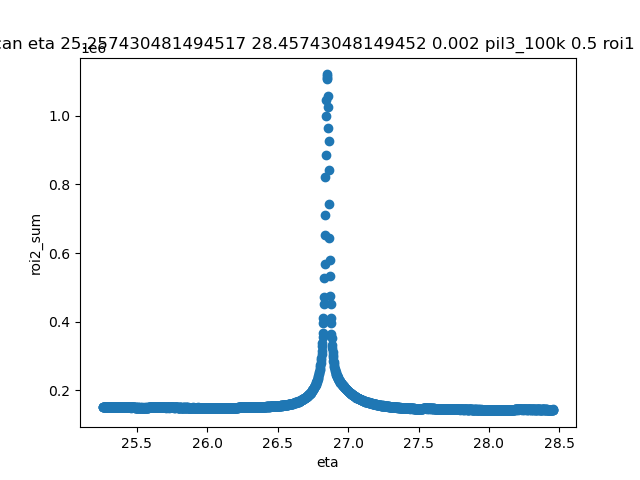

001 atten 0 harm mirrors in - long scan


<IPython.core.display.Javascript object>


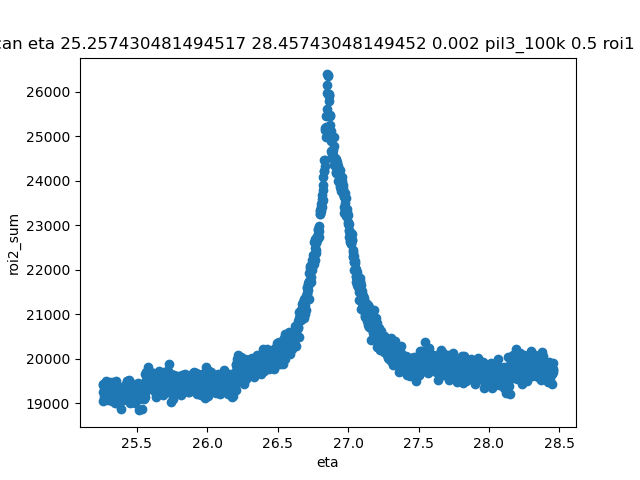

001 atten 2 (26%) harm mirrors in - long scan


<IPython.core.display.Javascript object>


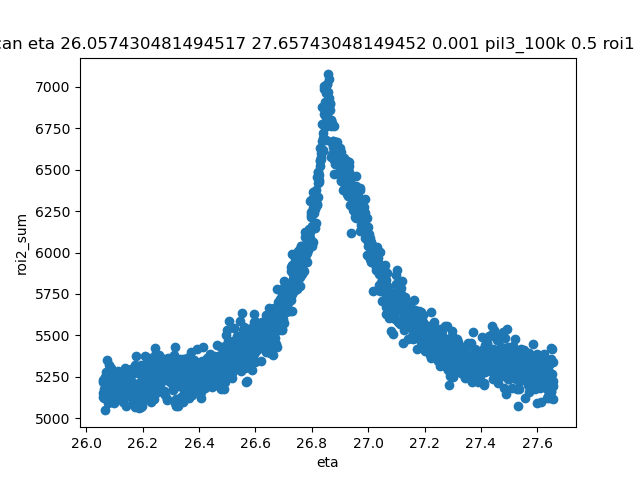

In [30]:
#second un-cut sample; 4th 1/8 turn without breaking!
# final turn - 1/4 this time...didn't break

txt =[]
txt+=['002 atten 20 harm mirrors out']
txt+=['002 atten 20 harm mirrors in']
txt+=['001 atten 0 harm mirrors out']
txt+=['001 atten 0 harm mirrors in']
txt+=['001 atten 2 (26%) harm mirrors in']
txt+=['002 atten 20 harm mirrors out - long scan']
txt+=['002 atten 20 harm mirrors in - long scan']
txt+=['001 atten 0 harm mirrors out - long scan']
txt+=['001 atten 0 harm mirrors in - long scan']
txt+=['001 atten 2 (26%) harm mirrors in - long scan']


scans = range(944957, 944966+1) # last will be #966
for i in range(len(scans)):
    print(txt[i])
    n = pdnx(p % scans[i])
    n.nx.plot()

In [32]:
pd.set_option('display.max_rows',9999)
def showscans(scans, metadata = []):
    # md is metadata list e.g. ['entry1/sample/name']
    _scanlist =[]
    for scan in scans:
        _n = pdnx(p % scan)
        dic = {}
        dic['scan'] = scan
        dic['length'] = len(_n)
        dic['command'] = _n.nx.entry1.scan_command
        dic['start_time'] = _n.nx.entry1.start_time
        for meta in metadata:
            dic[meta.split('/')[-1]] = _n.nx[meta]   
            
        _scanlist += [dic]
        
    return pd.DataFrame(_scanlist)

In [33]:
showscans(range(944806, 944966+1))

scan  length                                            command                  start_time
0    944806      41  scan eta 24.02405737710785 24.10405737710785 0...  2022-07-27T11:52:14.849+01
1    944807      21  scan eta 67.89529958823184 69.89529958823184 0...  2022-07-27T12:07:47.988+01
2    944808      21  scan eta 68.39529958823186 68.59529958823185 0...  2022-07-27T12:08:46.873+01
3    944809      21  scan eta 68.41529958823367 68.61529958823365 0...  2022-07-27T12:11:51.043+01
4    944810      21  scan delta 137.190599176465 137.390599176465 0...  2022-07-27T12:13:46.394+01
5    944811      21  scan eta 27.533911585879224 27.733911585879227...  2022-07-27T12:26:15.962+01
6    944812      21  scan eta 27.533911585879224 27.733911585879227...  2022-07-27T12:27:32.993+01
7    944813      21  scan eta 27.533911585879224 27.733911585879227...  2022-07-27T12:29:05.643+01
8    944814      21  scan eta 27.533911585879224 27.733911585879227...  2022-07-27T12:32:56.784+01
9    944815      17      scan base_y 21.1775 23.1775 0.1 pil3_100k 0.5  2022-07-27T13:44:50.827+01
10   944816      21      scan base_y 21.1775 23.1775 0.1 pil3_100k 0.5  2022-07-27T13:45:28.994+01
11   944817      21      scan base_y 22.8875 24.8875 0.1 pil3_100k 0.5  2022-07-27T13:48:28.331+01
12   944818      21  scan Base_z -0.99867925 -0.7986792500000001 0....  2022-07-27T13:51:57.752+01
13   944819      21    scan idgap 8.976 9.016 0.002 Waittime 0.5 diode  2022-07-27T14:04:03.725+01
14   944820      21  scan base_y 21.1775 23.1775 0.1 Waittime 0.5 d...  2022-07-27T14:24:39.256+01
15   944821      21  scan base_y 22.8975 24.8975 0.1 Waittime 0.5 d...  2022-07-27T14:27:32.297+01
16   944822      21  scan base_y 22.8975 24.8975 0.1 Waittime 0.5 d...  2022-07-27T14:28:09.206+01
17   944823      81  scan table_horiz 16.549374999999998 20.5493749...  2022-07-27T14:31:42.702+01
18   944824      21  scan base_y 22.8975 24.8975 0.1 Waittime 0.5 d...  2022-07-27T14:45:49.558+01
19   944825      21  scan base_y 22.8975 24.8975 0.1 Waittime 0.5 d...  2022-07-27T14:46:26.557+01
20   944826      21  scan Base_z -0.99867925 -0.7986792500000001 0....  2022-07-27T14:52:43.309+01
21   944827      21  scan eta 68.46053513244824 68.56053513244824 0...  2022-07-27T15:06:08.142+01
22   944828      21  scan eta 68.46053513244824 68.56053513244824 0...  2022-07-27T15:07:35.470+01
23   944829      21  scan eta 27.583911585879225 27.683911585879226...  2022-07-27T15:09:49.819+01
24   944830      21  scan eta 27.583911585879225 27.683911585879226...  2022-07-27T15:11:55.569+01
25   944831      21  scan eta 27.613911585879226 27.653911585879225...  2022-07-27T15:26:04.509+01
26   944832      21  scan eta 68.46053513244824 68.56053513244824 0...  2022-07-27T15:31:49.968+01
27   944833      21  scan eta 68.46053513244824 68.56053513244824 0...  2022-07-27T15:33:17.158+01
28   944834      21  scan eta 27.433292714352223 27.533292714352225...  2022-07-27T15:35:31.038+01
29   944835      21  scan eta 27.433292714352223 27.533292714352225...  2022-07-27T15:36:58.039+01
30   944836      21  scan eta 27.433292714352223 27.533292714352225...  2022-07-27T15:37:42.137+01
31   944837      21  scan eta 27.433292714352223 27.533292714352225...  2022-07-27T15:58:14.672+01
32   944838      21  scan eta 27.483292714352235 27.583292714352236...  2022-07-27T15:59:00.069+01
33   944839      19  scan eta 27.588292714352225 27.688292714352226...  2022-07-27T15:59:58.675+01
34   944840      41  scan eta 68.41053513244825 68.61053513244823 0...  2022-07-27T16:03:41.350+01
35   944841      41  scan eta 68.41053513244825 68.61053513244823 0...  2022-07-27T16:05:41.833+01
36   944842      41  scan eta 27.54325119362293 27.743251193622932 ...  2022-07-27T16:08:27.769+01
37   944843      41  scan eta 27.54325119362293 27.743251193622932 ...  2022-07-27T16:10:29.024+01
38   944844      41  scan eta 27.54325119362293 27.743251193622932 ...  2022-07-27T16:11:47.962+01
39   944845      41  scan eta 27.54325119362293

MS Reflections: 248
1 of 101
2 of 101
3 of 101
4 of 101
5 of 101
6 of 101
7 of 101
8 of 101
9 of 101
10 of 101
11 of 101
12 of 101
13 of 101
14 of 101
15 of 101
16 of 101
17 of 101
18 of 101
19 of 101
20 of 101
21 of 101
22 of 101
23 of 101
24 of 101
25 of 101
26 of 101
27 of 101
28 of 101
29 of 101
30 of 101
31 of 101
32 of 101
33 of 101
34 of 101
35 of 101
36 of 101
37 of 101
38 of 101
39 of 101
40 of 101
41 of 101
42 of 101
43 of 101
44 of 101
45 of 101
46 of 101
47 of 101
48 of 101
49 of 101
50 of 101
51 of 101
52 of 101
53 of 101
54 of 101
55 of 101
56 of 101
57 of 101
58 of 101
59 of 101
60 of 101
61 of 101
62 of 101
63 of 101
64 of 101
65 of 101
66 of 101
67 of 101
68 of 101
69 of 101
70 of 101
71 of 101
72 of 101
73 of 101
74 of 101
75 of 101
76 of 101
77 of 101
78 of 101
79 of 101
80 of 101
81 of 101
82 of 101
83 of 101
84 of 101
85 of 101
86 of 101
87 of 101
88 of 101
89 of 101
90 of 101
91 of 101
92 of 101
93 of 101
94 of 101
95 of 101
96 of 101
97 of 101
98 of 101
99 of 101

<IPython.core.display.Javascript object>


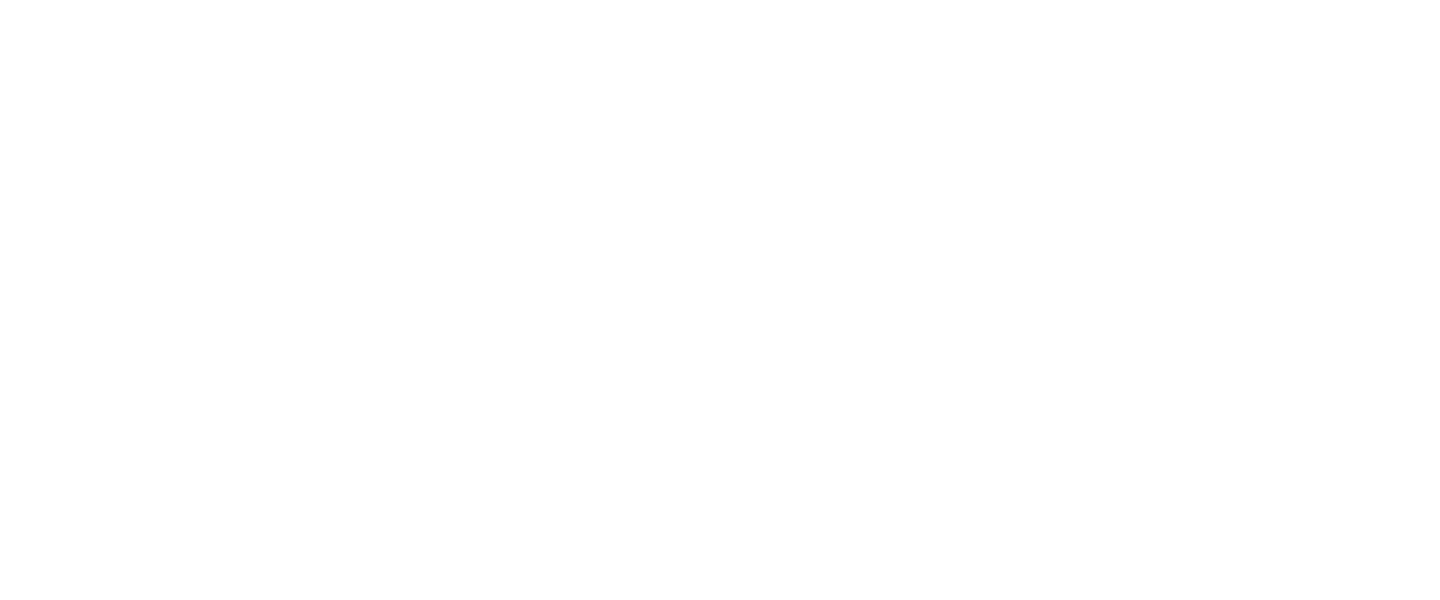

In [34]:
sys.path.append('/dls_sw/i16/software/python/userscripts/i16user/Dans_Diffraction')
import Dans_Diffraction as dif

cifpath = '/home/spc93/spc_cifs/'
cif_file=cifpath+'tio2_rutile_icsd_64987.cif'
xtl = dif.Crystal(cif_file)
#print(xtl)

mslist = xtl.Plot.plot_multiple_scattering(
    hkl=[0,0,1], 
    azir=[1,0,0], 
    pv=[1, 0], 
    energy_range=[4,6], 
    numsteps=101,
    full=False, 
    pv1=False, 
    pv2=False, 
    sfonly=True, 
    pv1xsf1=False
)


# Post-experiment plots

In [35]:
# hkl slices with scales and labels
# volume slicer with scales and labels (arbitrary index)
# look at paraview
#

=== Failed to create DataFrame from data - create empty DataFrame
reciprocal_space:NXdata
  @auxiliary_signals = 'weight'
  @axes = ['h-axis', 'k-axis', 'l-axis']
  @h-axis_indices = 0
  @k-axis_indices = 1
  @l-axis_indices = 2
  @signal = 'volume'
  h-axis = float64(193)
    @units = '/angstrom'
  k-axis = float64(196)
    @units = '/angstrom'
  l-axis = float64(217)
    @units = '/angstrom'
  volume = float64(193x196x217)
  weight = float64(193x196x217)


<IPython.core.display.Javascript object>


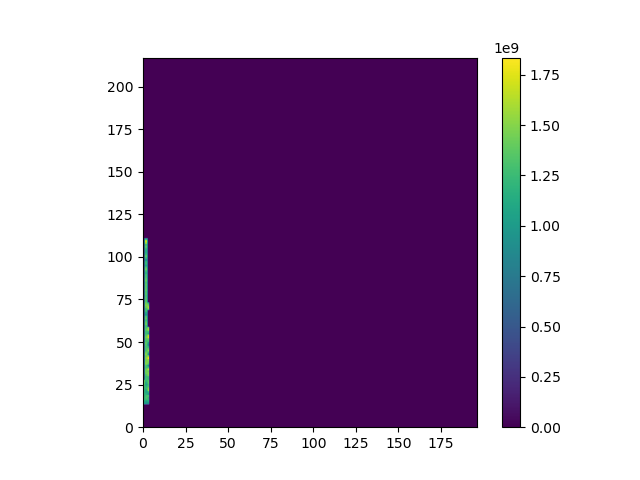

interactive(children=(IntSlider(value=0, description='index', max=192), Output()), _dom_classes=('widget-inter…

In [36]:
import ipywidgets as widgets
import matplotlib.pyplot as plt
#import numpy as np
%matplotlib notebook


def volume_slicer(vol_dat):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    (i_max, x_max, y_max)  = vol_dat.shape
    im1 = ax.imshow(vol_dat[0], extent = [0 , x_max, 0 , y_max])
    fig.colorbar(im1)

    @widgets.interact(index=(0, i_max-1, 1))

    def update(index = 0):  
        im1.set_data(vol_dat[int(index)])
        im1.autoscale()
        
# temp - testing - doesn't work yet        
def vol_slicer2(vol_dat, x_vec, yvec, zvec, idx = 2):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    (i_max, x_max, y_max)  = vol_dat.shape
    im1 = ax.imshow(vol_dat[0], extent = [0 , x_max, 0 , y_max])
    #im1 = ax.imshow(vol_dat[0], extent = [min(xvec) , max(xvec), min(yvec) , max(yvec)]) # doesn't work
    fig.colorbar(im1)

    @widgets.interact(index=(0, i_max-1, 1))

    def update(index = 0):  
        im1.set_data(vol_dat[int(index)])
        im1.autoscale()

r = pdnx('/dls/i16/data/2022/cm31138-12/processing/944862_remap_0005.nxs')
print(r.nx.processed.reciprocal_space.tree)
v, h, k, l = np.array(r.nx.processed.reciprocal_space.volume), np.array(r.nx.processed.reciprocal_space['h-axis']), np.array(r.nx.processed.reciprocal_space['k-axis']), np.array(r.nx.processed.reciprocal_space['l-axis'])
  
vol_slicer2(v, h, k, l, idx = 2)

In [37]:
#r = pdnx('/dls/i16/data/2022/cm31138-12/processing/944862_remap.nxs')
r = pdnx('/dls/i16/data/2022/cm31138-12/processing/944862_remap_0005.nxs')
print(r.nx.processed.reciprocal_space.tree)
v, h, k, l = r.nx.processed.reciprocal_space.volume, r.nx.processed.reciprocal_space['h-axis'], r.nx.processed.reciprocal_space['k-axis'], r.nx.processed.reciprocal_space['l-axis']



=== Failed to create DataFrame from data - create empty DataFrame
reciprocal_space:NXdata
  @auxiliary_signals = 'weight'
  @axes = ['h-axis', 'k-axis', 'l-axis']
  @h-axis_indices = 0
  @k-axis_indices = 1
  @l-axis_indices = 2
  @signal = 'volume'
  h-axis = float64(193)
    @units = '/angstrom'
  k-axis = float64(196)
    @units = '/angstrom'
  l-axis = float64(217)
    @units = '/angstrom'
  volume = float64(193x196x217)
  weight = float64(193x196x217)


In [38]:
# tmp cell
print(v.shape)
h
min(np.array(k))

(193, 196, 217)


-0.051000000000000004

<IPython.core.display.Javascript object>


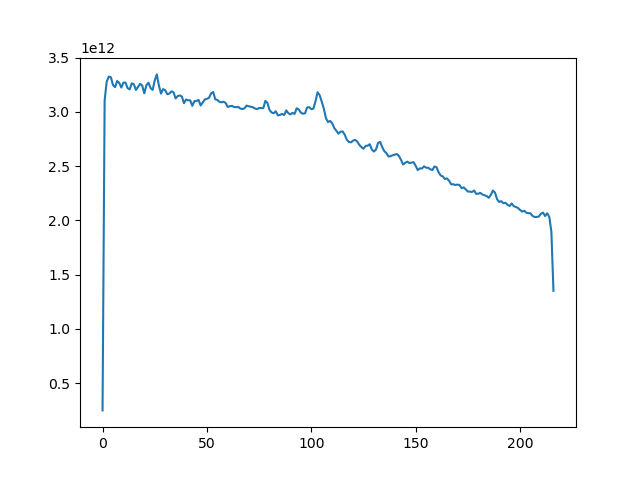

<IPython.core.display.Javascript object>


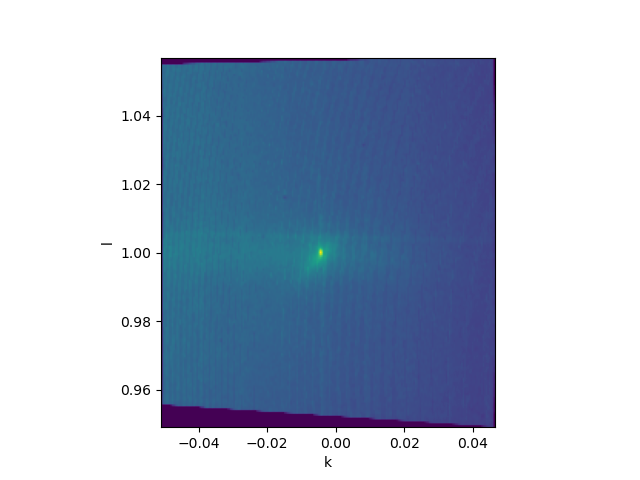

<IPython.core.display.Javascript object>


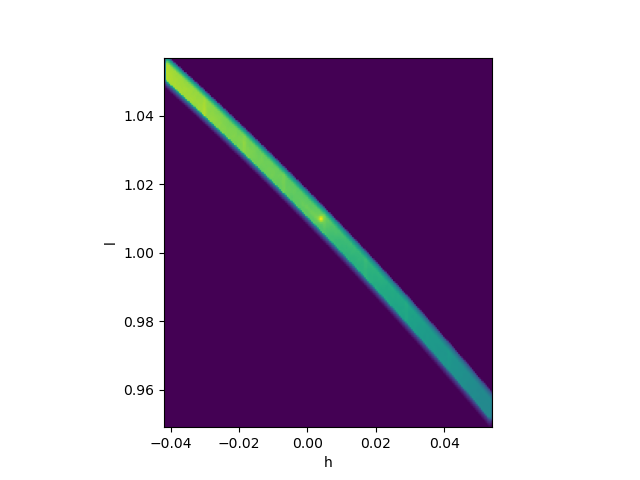

<IPython.core.display.Javascript object>


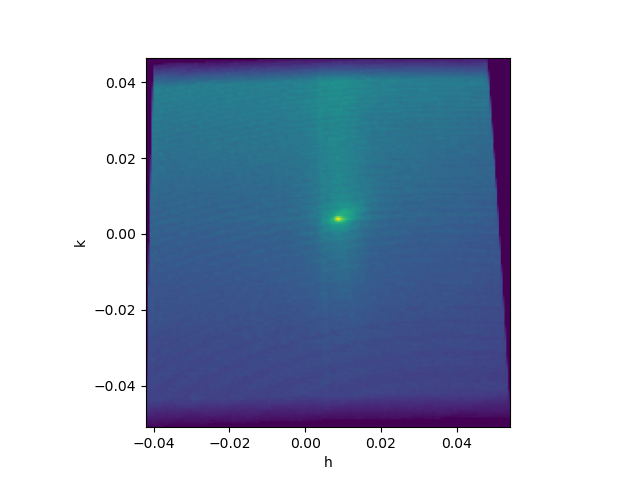

Text(0, 0.5, 'k')

In [39]:
v0, v1, v2 = v.sum(axis = 0), v.sum(axis = 1), v.sum(axis = 2)
ext = [min(np.array(h)), max(np.array(h)), min(np.array(k)), max(np.array(k)), min(np.array(l)), max(np.array(l))]

ldat = v.sum(axis = 0).sum(axis = 0)
figure()
plot(np.array(ldat))

#fig, ax = plt.subplots(1,1); imshow(np.log(v0), extent=(ext[2:6])); ax.set_xlabel('k'); ax.set_ylabel('l')
#fig, ax = plt.subplots(1,1); imshow(np.log(v1), extent=(ext[0:2] + ext[4:6])); ax.set_xlabel('h'); ax.set_ylabel('l')
#fig, ax = plt.subplots(1,1); imshow(np.log(v2), extent=(ext[0:4])); ax.set_xlabel('h'); ax.set_ylabel('k')

fig, ax = plt.subplots(1,1); imshow((v0), extent=(ext[2:6])); ax.set_xlabel('k'); ax.set_ylabel('l')
fig, ax = plt.subplots(1,1); imshow((v1), extent=(ext[0:2] + ext[4:6])); ax.set_xlabel('h'); ax.set_ylabel('l')
fig, ax = plt.subplots(1,1); imshow((v2), extent=(ext[0:4])); ax.set_xlabel('h'); ax.set_ylabel('k')


<IPython.core.display.Javascript object>


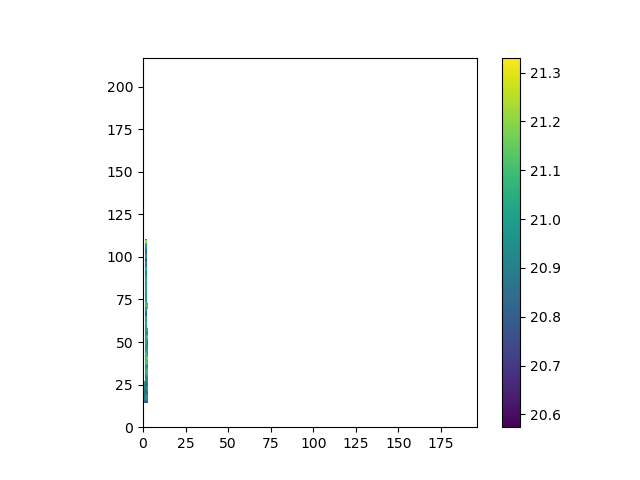

interactive(children=(IntSlider(value=0, description='index', max=192), Output()), _dom_classes=('widget-inter…

In [40]:
volume_slicer(np.log(v))

<IPython.core.display.Javascript object>


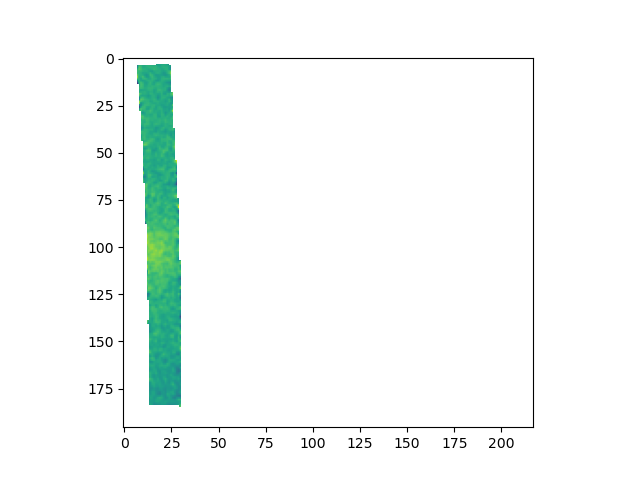

In [41]:
v.shape
figure()
imshow(np.log(v[20]))


######################## look at widget_test_tmp.ipynb #####################################

## Unstrained samples: comparison of three samples

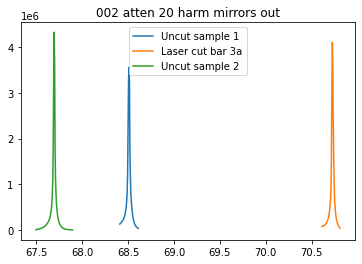

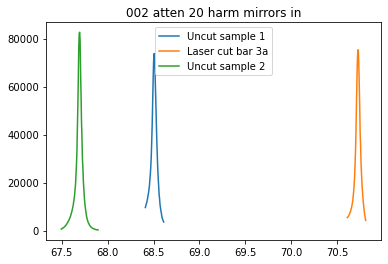

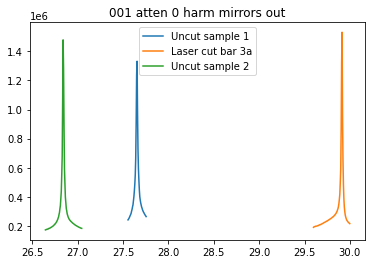

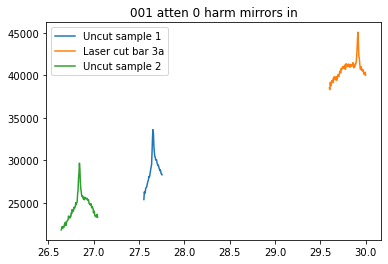

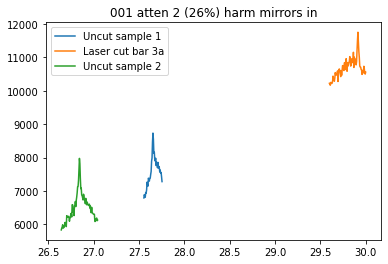

In [42]:
#%matplotlib notebook
%matplotlib inline

data = []
data += [{'sample':'Uncut sample 1', 'scans':list(range(944859, 944863+1))}]
data += [{'sample':'Laser cut bar 3a', 'scans':[944900, 944901, 944905, 944906, 944907]}]
data += [{'sample':'Uncut sample 2', 'scans':list(range(944916, 944920+1))}]

#no data from bar 3b - did it break before measuring? - yes      

txt =[]
txt+=['002 atten 20 harm mirrors out']
txt+=['002 atten 20 harm mirrors in']
txt+=['001 atten 0 harm mirrors out']
txt+=['001 atten 0 harm mirrors in']
txt+=['001 atten 2 (26%) harm mirrors in']


for i in range(5):
    figure(i)
    for dat in data:
        #print(dat, i, dat['scans'])
        n = pdnx(p % dat['scans'][i])
        plot(n.eta, n.roi2_sum, label = dat['sample']); title(txt[i])
    legend()
        


In [43]:
## Strained uncut sample 2 : comparison of four strains

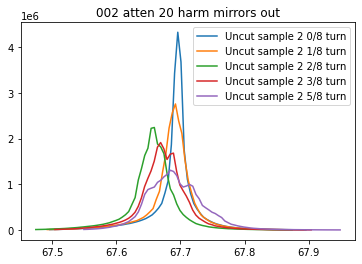

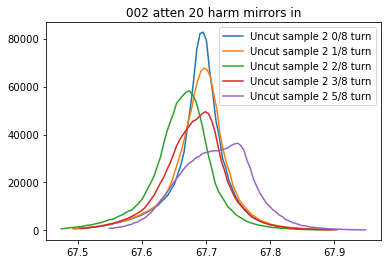

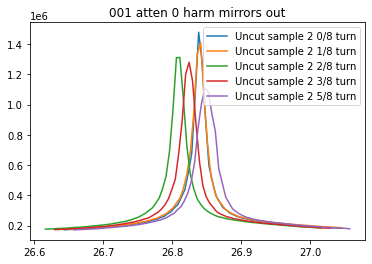

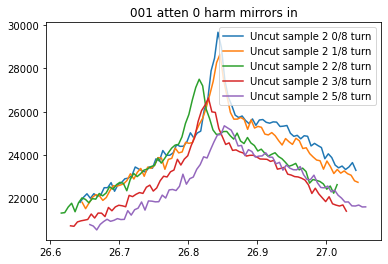

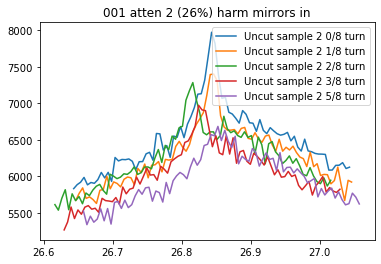

In [44]:
#%matplotlib notebook
%matplotlib inline

data = []
data += [{'sample':'Uncut sample 2 0/8 turn', 'scans':list(range(944916, 944920+1))}]
data += [{'sample':'Uncut sample 2 1/8 turn', 'scans':list(range(944923, 944927+1))}]
data += [{'sample':'Uncut sample 2 2/8 turn', 'scans':list(range(944932, 944937+1))}]
data += [{'sample':'Uncut sample 2 3/8 turn', 'scans':list(range(944942, 944946+1))}]
data += [{'sample':'Uncut sample 2 5/8 turn', 'scans':list(range(944957, 944961+1))}]


#no data from bar 3b - did it break before measuring? - yes      

txt =[]
txt+=['002 atten 20 harm mirrors out']
txt+=['002 atten 20 harm mirrors in']
txt+=['001 atten 0 harm mirrors out']
txt+=['001 atten 0 harm mirrors in']
txt+=['001 atten 2 (26%) harm mirrors in']


for i in range(5):
    figure(i)
    for dat in data:
        #print(dat, i, dat['scans'])
        n = pdnx(p % dat['scans'][i])
        plot(n.eta, n.roi2_sum, label = dat['sample']); title(txt[i])
    legend()
        


## Simulation from dynamical multiple scattering Matlab code
markdown/insert image (from local jupyter) (file in data folder under python)
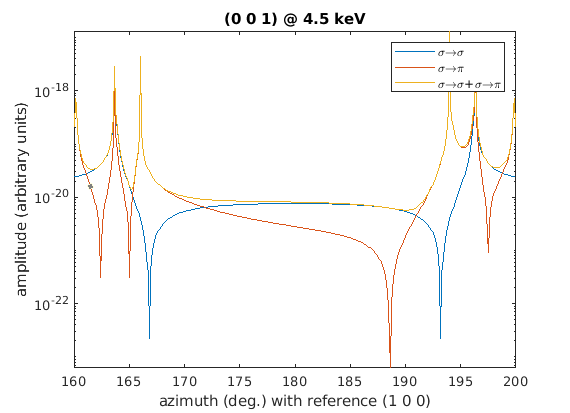

In [ ]:
## next: look at eta scans with small dynamic roi
##
## find peak in roi vs scan index
## fit peak i, j without outlyers
## (look at Ge/GGG notebooks)
## aim